<a href="https://colab.research.google.com/github/CesarMagnoJr/CeNN/blob/main/Difusao_Calor_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

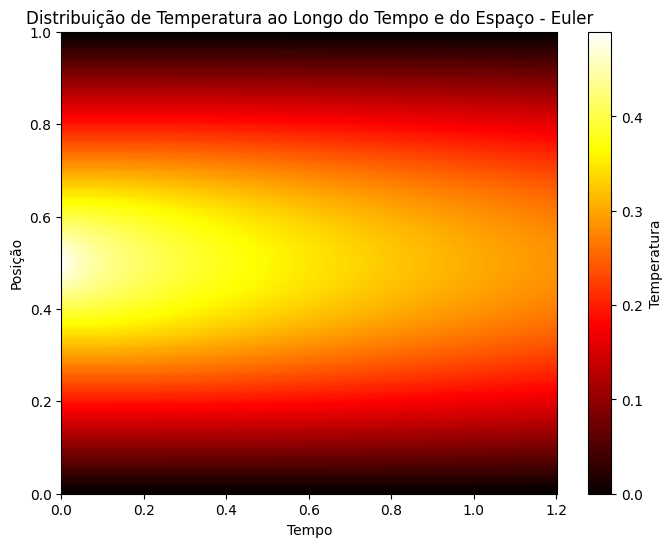

In [19]:
# Parâmetros
L = 1.0  # Comprimento do domínio
T = 1.2  # Tempo total
Nx = 50  # Número de pontos no espaço
Nt = 500  # Número de pontos no tempo
k = 0.03  # Coeficiente de difusão
dx = L / (Nx - 1)
dt = T / (Nt - 1)

# Inicialização da matriz de temperatura
T = np.zeros((Nx, Nt))

# Condição inicial
x = np.linspace(0, L, Nx)
T[:, 0] = np.where(x < 0.5, x, 1 - x)

# Condições de contorno
T[0, :] = 0
T[-1, :] = 0

# Método de Euler para EDP
for n in range(Nt - 1):
    for i in range(1, Nx - 1):
        T[i, n + 1] = T[i, n] + k * dt / dx**2 * (T[i + 1, n] - 2 * T[i, n] + T[i - 1, n])
TE = T
# Plotagem da solução
plt.figure(figsize=(8, 6))
plt.imshow(T, aspect='auto', extent=[0, T.shape[1]*dt, 0, L], cmap='hot', origin='lower')
plt.colorbar(label='Temperatura')
plt.title('Distribuição de Temperatura ao Longo do Tempo e do Espaço - Euler')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.show()

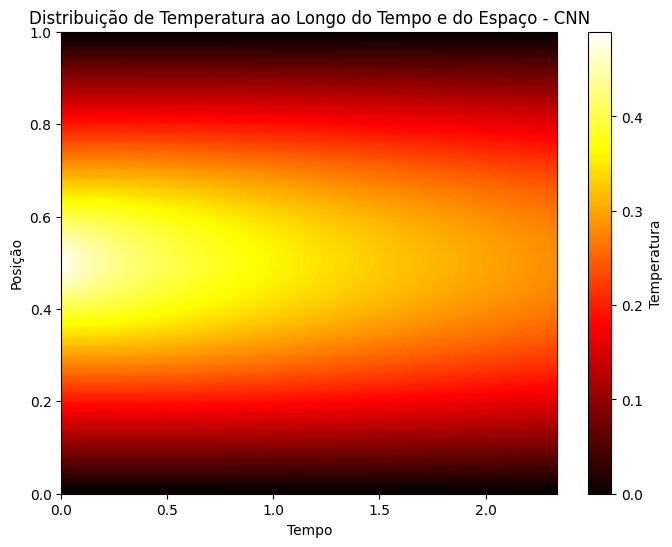

In [15]:
# Parâmetros
L = 1.0  # Comprimento do domínio
T = 7/3  # Tempo total
Nx = 50  # Número de pontos no espaço
Nt = 500  # Número de pontos no tempo
k = 0.03  # Coeficiente de difusão
dx = L / (Nx - 1)
dt = T / (Nt - 1)

# Inicialização da matriz de temperatura
T = np.zeros((Nx, Nt))

# Condição inicial
x = np.linspace(0, L, Nx)
T[:, 0] = np.where(x < 0.5, x, 1 - x)

# Condições de contorno
T[0, :] = 0
T[-1, :] = 0


ST = [[0       ,0         ,0   ],
      [(k * dt / dx**2)       ,(1 - 2*k*dt/dx**2)         ,(k * dt / dx**2 )   ],
      [0         ,0       ,0]]

funcao_deriv = lambda a, b, x, y, z, bs : -x + y + z + bs
# Método de Euler para EDP
for n in range(Nt - 1):
    for i in range(1, Nx - 1):

        Cx =  1*(T[i-1][n]*ST[1][2] + T[i][n]*ST[1][1] +  T[i+1][n]*ST[1][0])
        Nl = 0 #z0[0]*NLT[i][0]  +  z0[1]*NLT[i][1]   + z0[2]*NLT[i][2]

        # CALCULO DA DERIVADA PONTO A PONTO
        x_deriv = funcao_deriv(0,0,T[i][n],Cx,Nl,0)

        # CALCULO DA INTEGRAL PONTO A PONTO
        x_integ = solve_ivp(funcao_deriv,[0,1],[T[i][n]],args=(T[i][n],Cx,Nl,0), method='DOP853')
        # MONTAGEM DA LINHA DA MATRIZ
        x_novo = float(x_integ.y[0][1])
        T[i][n+1] = x_novo
TC = T
# Plotagem da solução
plt.figure(figsize=(8, 6))
plt.imshow(T, aspect='auto', extent=[0, T.shape[1]*dt, 0, L], cmap='hot', origin='lower')
plt.colorbar(label='Temperatura')
plt.title('Distribuição de Temperatura ao Longo do Tempo e do Espaço - CNN')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.show()

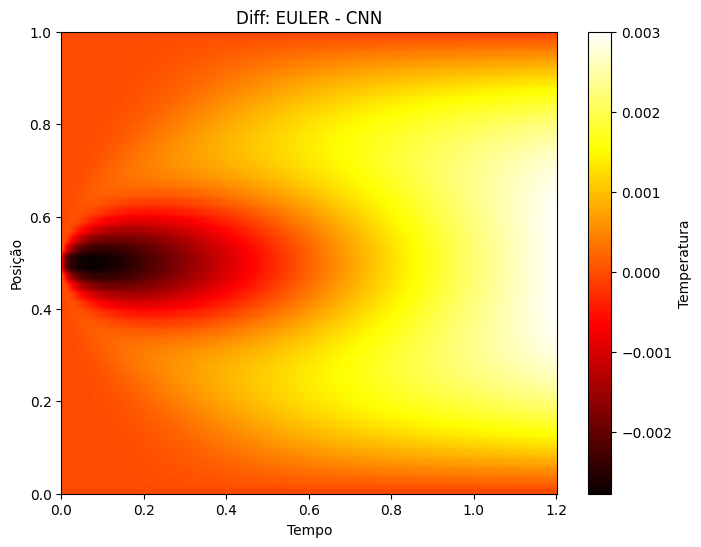

In [20]:
# Plotagem da Diferença
TD = TE - TC
plt.figure(figsize=(8, 6))
plt.imshow(TD, aspect='auto', extent=[0, TD.shape[1]*dt, 0, L], cmap='hot', origin='lower')
plt.colorbar(label='Temperatura')
plt.title('Diff: EULER - CNN')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.show()